In [1]:
# Importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.utils import resample

## Load the Dataset

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
# Inspect the first few rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Exploratory Data Analysis

In [4]:
# Check the shape of the dataset
df.shape

(284807, 31)

In [5]:
# Check the data types of each column
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
# Get an overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Class Distribution (Fraud vs Non-Fraud)

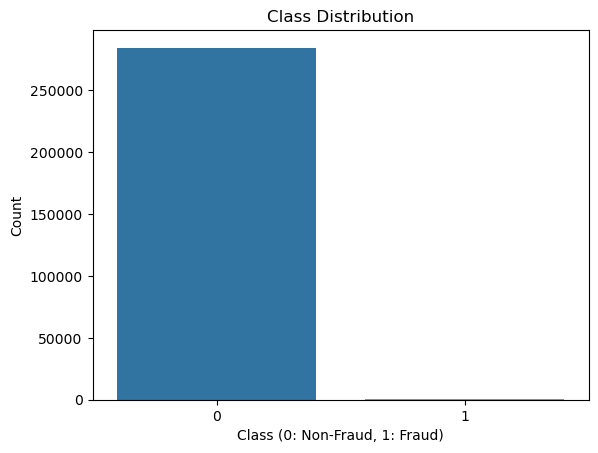

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize class distribution
sns.countplot(x='Class', data=df)
plt.title("Class Distribution")
plt.xlabel("Class (0: Non-Fraud, 1: Fraud)")
plt.ylabel("Count")
plt.show()

#### Distribution of Transaction Amounts

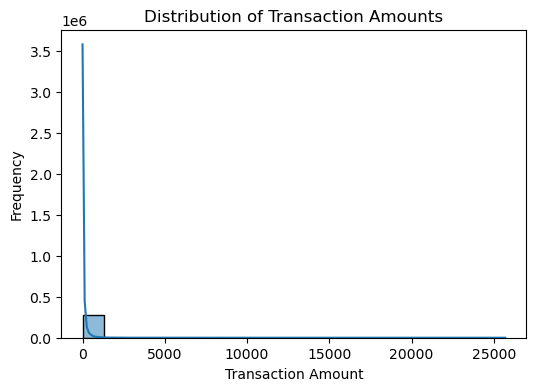

In [9]:
# Plot the distribution of transaction amounts
plt.figure(figsize=(6,4))
sns.histplot(df['Amount'], bins=20, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

#### Time vs Amount for Fraud and Non-Fraud Transactions

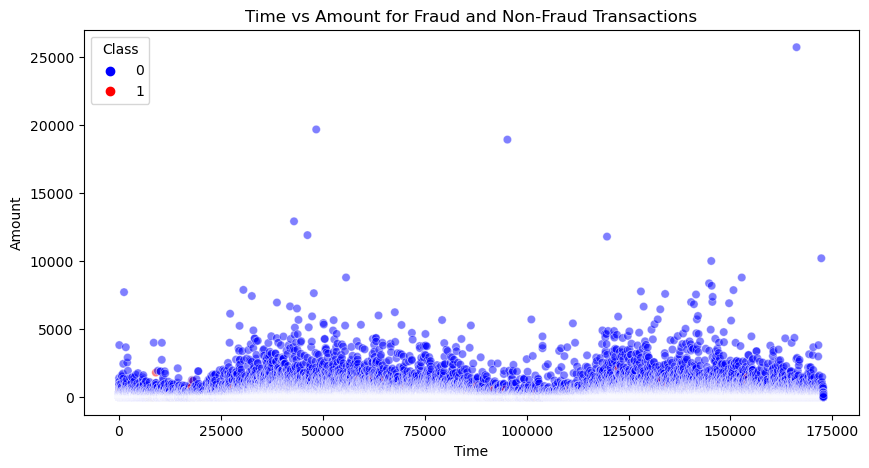

In [10]:
# Time vs Amount for Fraud and Non-Fraud transactions
plt.figure(figsize=(10,5))
sns.scatterplot(x='Time', y='Amount', hue='Class', data=df, alpha=0.5, palette={0: "blue", 1: "red"})
plt.title('Time vs Amount for Fraud and Non-Fraud Transactions')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()


#### Correlation Heatmap

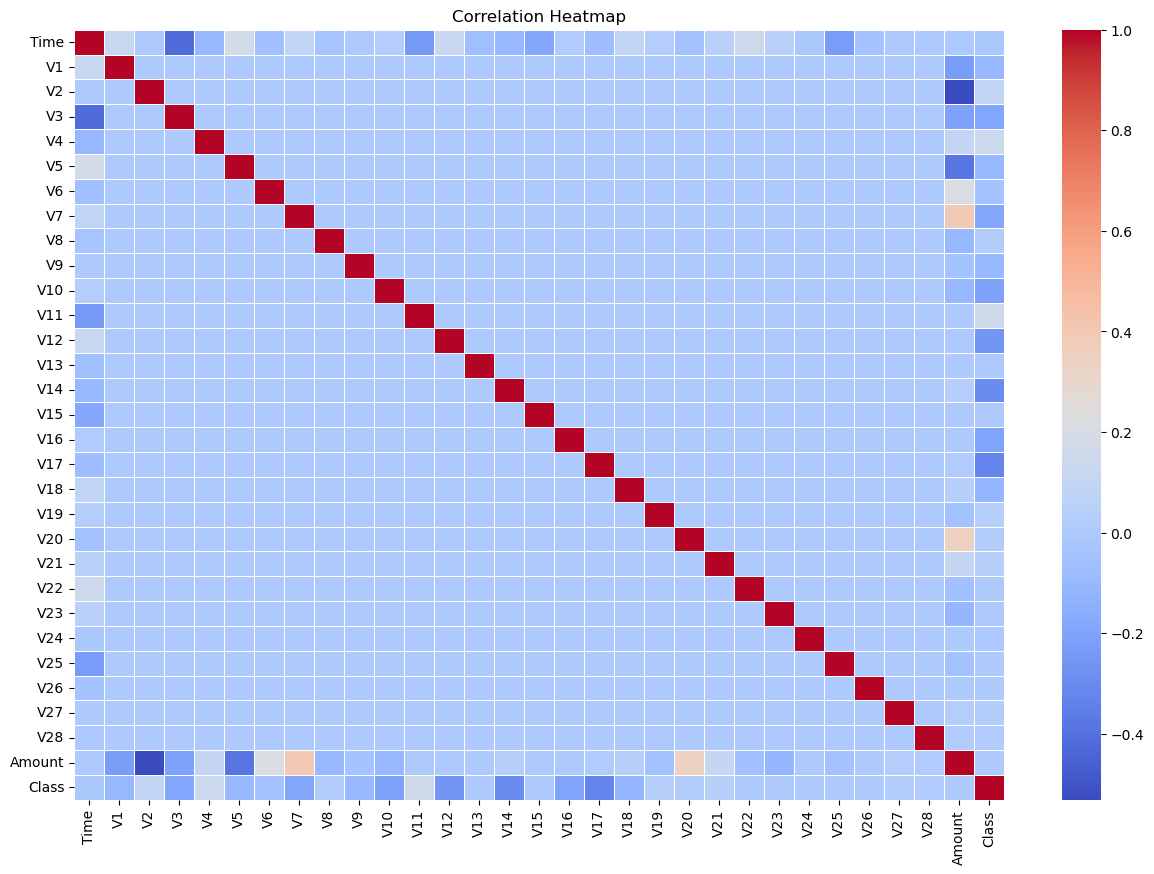

In [11]:
# Correlation heatmap
plt.figure(figsize=(15,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


#### Boxplot of Amount vs Class

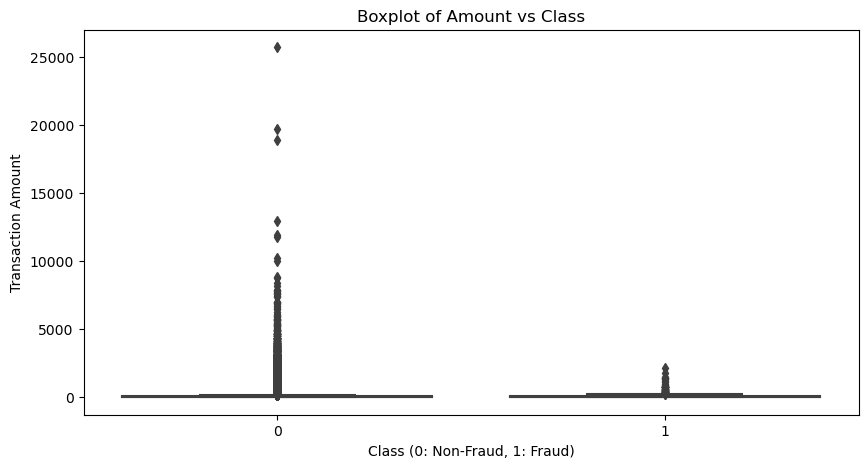

In [12]:
# Boxplot of Amount vs Class
plt.figure(figsize=(10,5))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Boxplot of Amount vs Class')
plt.xlabel('Class (0: Non-Fraud, 1: Fraud)')
plt.ylabel('Transaction Amount')
plt.show()

## Data Cleaning

In [13]:
# Check for missing values percentage
df.isnull().sum()/len(df) *100

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [14]:
# 2. Handling Missing Values
# missing_values = df.isnull().sum()
# missing_values[missing_values > 0]

# Uncomment the following line if you have missing values
# df.fillna(df.mean(), inplace=True)


 #### Identifying and Handling Outliers using Z-Score for Outlier Detection

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# Load dataset
df = pd.read_csv('creditcard.csv')

# 1. Standardization
scaler = StandardScaler()
numerical_features = df.drop(columns=['Class'])
df[numerical_features.columns] = scaler.fit_transform(numerical_features)


# 3. Identifying and Handling Outliers
z_scores = np.abs((df[numerical_features.columns] - df[numerical_features.columns].mean()) / df[numerical_features.columns].std())
threshold = 3
outliers = (z_scores > threshold).any(axis=1)

# Print number of outliers
print(f'Number of outliers: {outliers.sum()}')

# Optionally remove outliers
df = df[~outliers]

# Check the shape after removing outliers
print(f"Dataset shape after removing outliers: {df.shape}")


Number of outliers: 37816
Dataset shape after removing outliers: (246991, 31)


## Dealing with Imbalanced data

#### Check the class distribution

In [16]:
df['Class'].value_counts()

Class
0    246943
1        48
Name: count, dtype: int64

the dataset creditcard.csv is loaded, and we check the distribution of the classes. You will see that the majority class (non-fraudulent transactions, Class == 0) greatly outnumbers the minority class (fraudulent transactions, Class == 1).

#### Separate Majority and Minority Classes

In [17]:
# Separate majority and minority classes
majority_class = df[df['Class'] == 0]  # Non-fraudulent transactions
minority_class = df[df['Class'] == 1]  # Fraudulent transactions

#### Apply Over-Sampling to the Minority Class

In [18]:
from sklearn.utils import resample

# Over-sample the minority class
minority_upsampled = resample(minority_class, 
                              replace=True,     # Sample with replacement
                              n_samples=len(majority_class),  # Match the majority class size
                              random_state=42)  # Set a seed for reproducibility


#### Combine the Over-Sampled Minority Class with the Majority Class

In [19]:
# Combine the upsampled minority class with the original majority class
df_upsampled = pd.concat([majority_class, minority_upsampled])

# Check class distribution after over-sampling
df_upsampled['Class'].value_counts()

Class
0    246943
1    246943
Name: count, dtype: int64

#### Apply Under-Sampling to the Majority Class

In [20]:
# Apply under-sampling to the majority class
majority_downsampled = resample(df_upsampled[df_upsampled['Class'] == 0], 
                                replace=False,  # Sample without replacement
                                n_samples=len(minority_class),  # Match the original minority class size
                                random_state=42)  # Reproducibility


#### Create the Final Resampled Dataset

In [21]:
# Combine down-sampled majority class with original minority class
df_resampled = pd.concat([majority_downsampled, minority_class])

# Check final class distribution after under-sampling
df_resampled['Class'].value_counts()

Class
0    48
1    48
Name: count, dtype: int64

## Feature Engineering

#### Creating New Features

In [22]:
import numpy as np

# Creating a new feature: Hour of the Day from Time (assuming Time is in seconds)
df_upsampled['Hour'] = (df_upsampled['Time'] / 3600).astype(int) % 24  # Converts Time to hours

# Creating a binary feature: Weekend or Weekday
df_upsampled['Is_Weekend'] = ((df_upsampled['Hour'] >= 0) & (df_upsampled['Hour'] < 6)).astype(int)  # Transactions between 12 AM and 6 AM as potentially risky

# Log transformation of Amount to reduce skewness
df_upsampled['Log_Amount'] = np.log1p(df_upsampled['Amount'])  # log1p is used to avoid log(0)

# You might also want to drop the original Amount feature if it's no longer needed
df_upsampled = df_upsampled.drop(columns=['Amount'])

#### Removing Irrelevant Features

In [23]:
# Check the correlation matrix to identify highly correlated features
correlation_matrix = df_upsampled.corr()
high_corr = correlation_matrix[abs(correlation_matrix) > 0.8]

# Identify features to drop (keeping one of the highly correlated features)
features_to_drop = high_corr.columns[high_corr.nunique() > 1].tolist()
df_upsampled.drop(columns=features_to_drop, inplace=True)

In [24]:
df_upsampled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Class,Hour,Is_Weekend,Log_Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0,0,1,0.219107
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,0,0,1,-0.419272
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0,0,1,0.131497
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,0,0,1,-0.076237
5,-1.996541,-0.217475,0.581675,0.752585,-0.118833,0.305009,-0.022313,0.384936,0.217955,-0.517619,...,-0.042273,-0.613273,-0.446584,0.219637,0.628900,0.245636,0,0,1,-0.413331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68633,-0.878913,0.661784,0.252798,0.127923,0.636815,0.094571,-0.278948,0.127821,-0.169689,-0.072374,...,-0.193803,-0.727247,1.288259,-0.857520,0.081356,0.062409,1,0,1,-0.428496
68633,-0.878913,0.661784,0.252798,0.127923,0.636815,0.094571,-0.278948,0.127821,-0.169689,-0.072374,...,-0.193803,-0.727247,1.288259,-0.857520,0.081356,0.062409,1,0,1,-0.428496
245556,1.221110,0.675310,-0.511057,-1.382941,0.536604,-0.142277,-0.875463,0.390055,-0.292871,0.951191,...,-0.334007,-0.420628,-0.188622,-1.273000,0.006576,0.219296,1,0,1,0.731351
192687,0.736904,0.777090,-0.314557,-1.702675,0.547185,0.149772,-1.074123,0.611928,-0.372100,0.908332,...,-0.396266,-0.461444,0.459729,-1.054273,-0.038529,0.126879,1,0,1,0.560143


#### Split Features and Labels

In [25]:
# Features and labels
X = df_upsampled.drop(columns=['Class'])
y = df_upsampled['Class']

#### Split Data into Training and Test Sets

In [26]:
from sklearn.model_selection import train_test_split

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## Model Selection

#### Random Forest Classifier

## Model Training

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Train a random forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = rf.score(X_train,y_train)
#print('R2 sq: ',model_score)
model_score

1.0

## Model Validation

In [29]:
from sklearn.metrics import classification_report

# Predict 
y_pred = rf.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

[[74083     0]
 [    0 74083]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     74083
           1       1.00      1.00      1.00     74083

    accuracy                           1.00    148166
   macro avg       1.00      1.00      1.00    148166
weighted avg       1.00      1.00      1.00    148166

1.0


In [31]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred ,pos_label=1))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred ,pos_label=1))
# Model AUC-ROC Score
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
AUC-ROC Score: 1.0


#### Logistic Regression

In [32]:
# Train a Logistic Regression model
log_reg = LogisticRegression(random_state=42, max_iter=1000)  # Increase max_iter if convergence warnings occur
log_reg.fit(X_train, y_train)

<IPython.core.display.Javascript object>

LogisticRegression(max_iter=1000, random_state=42)

In [33]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = log_reg.score(X_train,y_train)
#print('R2 sq: ',model_score)
model_score

0.8946951290061321

In [34]:
from sklearn.metrics import classification_report

# Predict 
y_pred = log_reg.predict(X_test)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))  

[[64485  9598]
 [ 6166 67917]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89     74083
           1       0.88      0.92      0.90     74083

    accuracy                           0.89    148166
   macro avg       0.89      0.89      0.89    148166
weighted avg       0.89      0.89      0.89    148166

0.8936058204986299


In [36]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
# Model Precision
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label=1))
# Model Recall
print("Recall:",metrics.recall_score(y_test, y_pred, pos_label=1))
# Model AUC-ROC Score
print("AUC-ROC Score:", roc_auc_score(y_test, y_pred))

Accuracy: 0.8936058204986299
Precision: 0.8761788041024318
Recall: 0.9167690293319655
AUC-ROC Score: 0.8936058204986299


#### Save Model

In [38]:
import joblib

# Save Random Forest model
joblib.dump(rf, 'model.pkl')

['model.pkl']